<a href="https://colab.research.google.com/github/ALZ112/pytorch-Learn/blob/main/torch_learn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import torch
import matplotlib.pyplot as plt
#Generate some data

# Known Parameters, this is what we will try to predict
a, b, c = 0.2, 0.3, -0.1

X = torch.arange(-1,1,0.001).unsqueeze(dim=1)#This add a dimension(an extra set of brakets) -> necessary to avoid errors
y = a * X ** 2 + b * X + c

X[:10], y[:10]

(tensor([[-1.0000],
         [-0.9990],
         [-0.9980],
         [-0.9970],
         [-0.9960],
         [-0.9950],
         [-0.9940],
         [-0.9930],
         [-0.9920],
         [-0.9910]]),
 tensor([[-0.2000],
         [-0.2001],
         [-0.2002],
         [-0.2003],
         [-0.2004],
         [-0.2005],
         [-0.2006],
         [-0.2007],
         [-0.2008],
         [-0.2009]]))

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(1600, 1600, 400, 400)

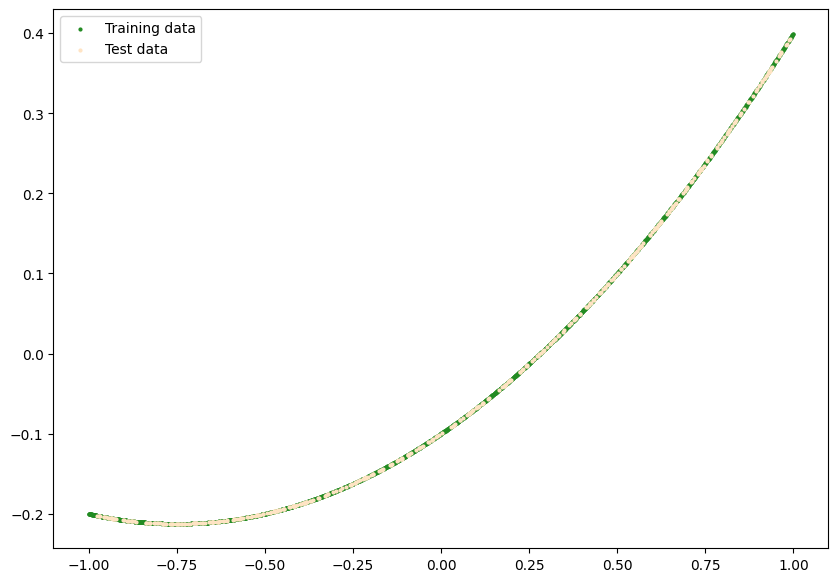

In [60]:
import matplotlib.pyplot as plt

def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions= None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #Plot for the training data
  plt.scatter(train_data, train_labels,c='forestgreen',s=4,label="Training data")
  #Plot for the test data
  plt.scatter(test_data, test_labels,c='bisque',s=4,label="Test data")

  #Plot the predictions if they exist
  if predictions is not None:

    plt.scatter(test_data,predictions, c='r',s=4, label="Predictions")

  #Showing the legend
  plt.legend()

#Plotting the data
plot_predictions()

In [61]:
import torch.nn as nn
class Regressionmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.a = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.b = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.c = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,x):
    return self.a * x ** 2 + self.b * x + self.c


In [62]:
torch.manual_seed(42)
model = Regressionmodel()
# list(model.parameters())
print(model.state_dict())

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288])), ('c', tensor([0.2345]))])


In [63]:
predictions = model(X_train)
# predictions

In [64]:
#Extracting the first value in our X_train tensor
x_0 = X_test[0][0]

# Extracting the model parameter values into a list
values = [value.item() for value in model.state_dict().values()]

# Unpacking the list into variables
a_val, b_val, c_val = values
print(a_val,b_val,c_val)
#Applies the initial weight to our computation
result = a_val * x_0 ** 2 + b_val * x_0 + c_val

print(f"The result of our computation on the first value of X_train is: {result}")
print(f"\nLet's check if the result value is the same as the first value in our predictions")
print(f"result == prediction: {torch.eq(result, predictions[0][0])}")# this checks if two tensors are equal
print(result)
print(predictions[0][0])

0.33669036626815796 0.12880940735340118 0.23446236550807953
The result of our computation on the first value of X_train is: 0.5942546725273132

Let's check if the result value is the same as the first value in our predictions
result == prediction: False
tensor(0.5943)
tensor(0.2307, grad_fn=<SelectBackward0>)


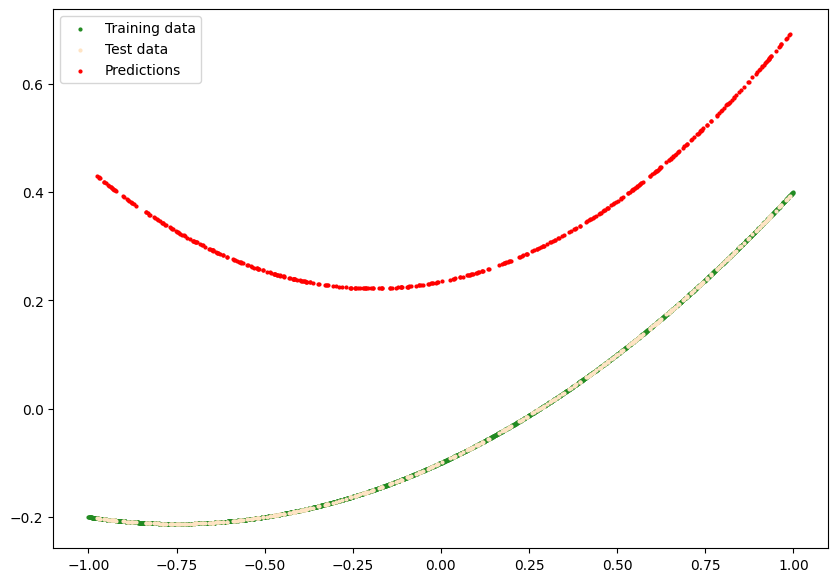

In [65]:
# let's make some predictions of our test data and visualize the performance of our initial parameters
with torch.inference_mode(): # PyTorch context manager for better performance when testing your model
  y_preds = model(X_test)

plot_predictions(predictions=y_preds)


In [66]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [67]:
#Initial gradient for model paramters
print(f"These are the intial random values for the model parameter:{model.state_dict()}")
print(f"The initial gradients are: {model.a.grad,model.b.grad,model.c.grad}")

# let's compute the loss on the training predictions
loss = loss_fn(predictions,y_train)

print(f"\nLets calculate the gradients thanks to Autograd")
# call loss.backward()
loss.backward()

# check the gradients again
print(f"The gradients for each parameter are: {model.a.grad,model.b.grad,model.c.grad}")
print(f"But model paramter remain unchanged: {model.state_dict()}")

These are the intial random values for the model parameter:OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288])), ('c', tensor([0.2345]))])
The initial gradients are: (None, None, None)

Lets calculate the gradients thanks to Autograd
The gradients for each parameter are: (tensor([0.3295]), tensor([-0.0036]), tensor([1.]))
But model paramter remain unchanged: OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288])), ('c', tensor([0.2345]))])


In [68]:
# Optimize the model based on the calculated gradients
optimizer.step()

print(f"The new parameters after optimization are:{model.state_dict()}")
print(f"The current gradients are: {model.a.grad,model.b.grad,model.c.grad}")

The new parameters after optimization are:OrderedDict([('a', tensor([0.3334])), ('b', tensor([0.1288])), ('c', tensor([0.2245]))])
The current gradients are: (tensor([0.3295]), tensor([-0.0036]), tensor([1.]))


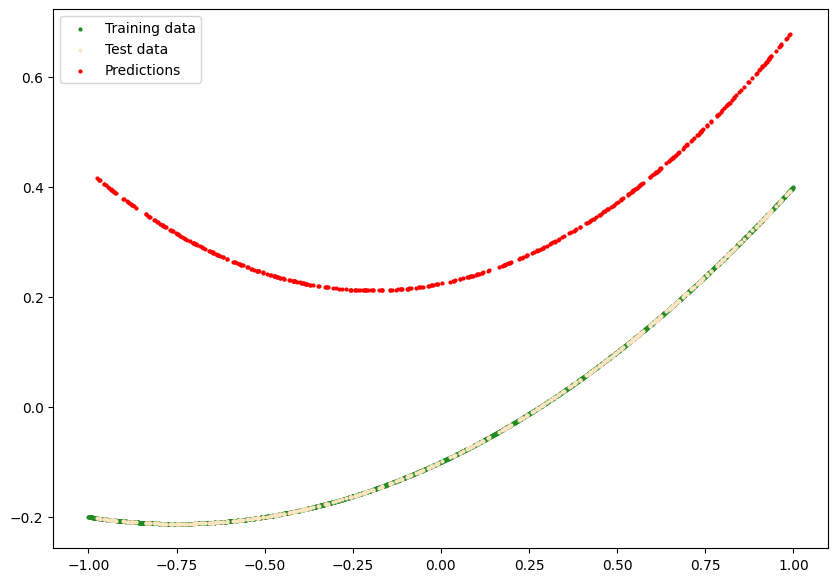

In [69]:
# let's make some predictions of our test data
with torch.inference_mode():
  y_preds = model(X_test)

plot_predictions(predictions=y_preds)

In [70]:
# use forward method with the new parameters
print(f"Model parameters: {model.state_dict()}")

predictions = model(X_train)
# let's compute the loss on the training predictions
loss = loss_fn(predictions,y_train)

# call loss.backward() to calculate the gradients
loss.backward()

print(f"The current gradients are: {model.a.grad,model.b.grad,model.c.grad}")

Model parameters: OrderedDict([('a', tensor([0.3334])), ('b', tensor([0.1288])), ('c', tensor([0.2245]))])
The current gradients are: (tensor([0.6589]), tensor([-0.0072]), tensor([2.]))


In [71]:
#let's clear the gradients
optimizer.zero_grad()
print(f"After clearning the gradients are: {model.a.grad,model.b.grad,model.c.grad}")

print(f"\nLet's try to optimize again")

predictions = model(X_train)
# let's compute the loss on the training predictions
loss = loss_fn(predictions,y_train)

# call loss.backward() to calculate the gradients
loss.backward()

print(f"The current gradients are: {model.a.grad,model.b.grad,model.c.grad}")

optimizer.step()
print(f"\nThe new parameters after second optimization are:{model.state_dict()}")

print(f"Let's clear the gradients for next optimization")

optimizer.zero_grad()
print(f"After clearning the gradients are: {model.a.grad,model.b.grad,model.c.grad}")

After clearning the gradients are: (None, None, None)

Let's try to optimize again
The current gradients are: (tensor([0.3295]), tensor([-0.0036]), tensor([1.]))

The new parameters after second optimization are:OrderedDict([('a', tensor([0.3301])), ('b', tensor([0.1289])), ('c', tensor([0.2145]))])
Let's clear the gradients for next optimization
After clearning the gradients are: (None, None, None)


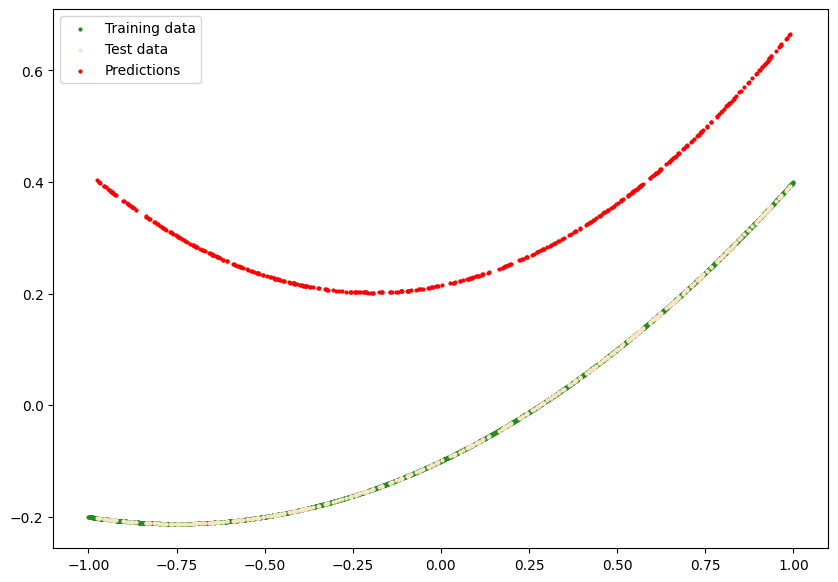

In [72]:
# let's make some predictions of our test data
with torch.inference_mode():
  y_preds = model(X_test)

plot_predictions(predictions=y_preds)

In [73]:
#let' see the impact of the Learning rate hyperparameter
#set random seed
torch.manual_seed(42)
model_0 = Regressionmodel()
model_1 = Regressionmodel()

optimizer_0 = torch.optim.SGD(params= model_0.parameters(),
                           lr =0.01)
optimizer_1 = torch.optim.SGD(params= model_1.parameters(),
                           lr =0.1)

#Initial  model paramters
print(f"These are the intial random values for  model_0 parameters:{model_0.state_dict()}")
print(f"These are the intial random values for  model_1 parameters:{model_0.state_dict()}")

#Make predictions on training data with both models
predictions_0 = model_0(X_train)
predictions_1 = model_1(X_train)

# let's compute the loss on the training predictions
loss_0 = loss_fn(predictions_0,y_train)
loss_1 = loss_fn(predictions_1,y_train)

print(f"\nLets calculate the gradients thanks to Autograd")
# call loss.backward()
loss_0.backward()
loss_1.backward()

# check the gradients for each model
print(f"\nThe gradients for each parameters in model_0 are: {model_0.a.grad,model_0.b.grad,model_0.c.grad}")
print(f"The gradients for each parameters in model_1 are: {model_1.a.grad,model_1.b.grad,model_1.c.grad}")

#Optimize the model parameters
optimizer_0.step()
optimizer_1.step()

#let's check the parameter values after the optimization with different `lr` values

print(f"\nThe parameters for model_0 with lr = 0.01 are : {model_0.state_dict()} ")
print(f"The parameters for model_1 with lr = 0.1 are : {model_1.state_dict()} ")

These are the intial random values for  model_0 parameters:OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288])), ('c', tensor([0.2345]))])
These are the intial random values for  model_1 parameters:OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288])), ('c', tensor([0.2345]))])

Lets calculate the gradients thanks to Autograd

The gradients for each parameters in model_0 are: (tensor([0.3295]), tensor([-0.0036]), tensor([1.]))
The gradients for each parameters in model_1 are: (tensor([0.0034]), tensor([-0.4925]), tensor([-0.0612]))

The parameters for model_0 with lr = 0.01 are : OrderedDict([('a', tensor([0.3334])), ('b', tensor([0.1288])), ('c', tensor([0.2245]))]) 
The parameters for model_1 with lr = 0.1 are : OrderedDict([('a', tensor([0.2300])), ('b', tensor([-1.0736])), ('c', tensor([-0.1802]))]) 


In [75]:
loss_fn = nn.L1Loss()
optimzer = torch.optim.SGD(model.parameters(),lr = 0.01)
epochs = 100
for i in range(epochs):
  model.train()
  predictions = model(X_train)
  loss = loss_fn(predictions,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_predictions = model(X_test)
    test_loss = loss_fn(test_predictions,y_test)
    if i%10 == 0:
      print(f"Epoch {i} Train loss {loss} Test loss {test_loss}")


Epoch 0 Train loss 0.0008713594288565218 Test loss 0.010279227048158646
Epoch 10 Train loss 0.0008713594288565218 Test loss 0.010279227048158646
Epoch 20 Train loss 0.0008713594288565218 Test loss 0.010279227048158646
Epoch 30 Train loss 0.0008713594288565218 Test loss 0.010279227048158646
Epoch 40 Train loss 0.0008713594288565218 Test loss 0.010279227048158646
Epoch 50 Train loss 0.0008713594288565218 Test loss 0.010279227048158646
Epoch 60 Train loss 0.0008713594288565218 Test loss 0.010279227048158646
Epoch 70 Train loss 0.0008713594288565218 Test loss 0.010279227048158646
Epoch 80 Train loss 0.0008713594288565218 Test loss 0.010279227048158646
Epoch 90 Train loss 0.0008713594288565218 Test loss 0.010279227048158646


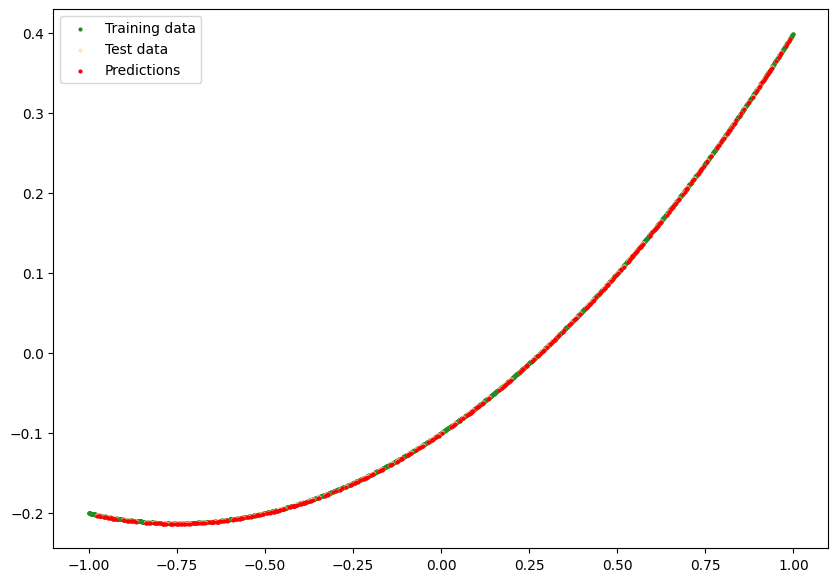

In [76]:
with torch.inference_mode():
  y_preds = model(X_test)

plot_predictions(predictions=y_preds)